Use SMOTE technique to generate synthetic data on the given dataset and evaluate the performance.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

Saving exp5_Admission_St.xlsx to exp5_Admission_St.xlsx


In [4]:
# Read the dataset from Excel (.xlsx) format
import pandas as pd
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)  # Using read_excel instead of read_csv

In [5]:
# Display the first few rows of the dataset
print("Original dataset:")
print(df.head())

Original dataset:
   Admit  GRE   GPA  RANK
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [6]:
# Check class distribution
print("\nClass distribution before SMOTE:")
print(df['Admit'].value_counts())


Class distribution before SMOTE:
Admit
0    273
1    127
Name: count, dtype: int64


In [7]:
# Separate features and target variable
X = df.drop('Admit', axis=1)
y = df['Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train a model on the imbalanced dataset
print("\n--- Before SMOTE ---")
model_before = LogisticRegression(random_state=42)
model_before.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_before = model_before.predict(X_test_scaled)
print("\nClassification Report (Before SMOTE):")
print(classification_report(y_test, y_pred_before))


--- Before SMOTE ---

Classification Report (Before SMOTE):
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.57      0.15      0.24        27

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.51        80
weighted avg       0.65      0.68      0.61        80



In [9]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
unique, counts = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique, counts)))


Class distribution after SMOTE:
{np.int64(0): np.int64(220), np.int64(1): np.int64(220)}


In [10]:
# Train a model on the balanced dataset
print("\n--- After SMOTE ---")
model_after = LogisticRegression(random_state=42)
model_after.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_after = model_after.predict(X_test_scaled)
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred_after))


--- After SMOTE ---

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        53
           1       0.42      0.63      0.51        27

    accuracy                           0.59        80
   macro avg       0.59      0.60      0.58        80
weighted avg       0.64      0.59      0.60        80



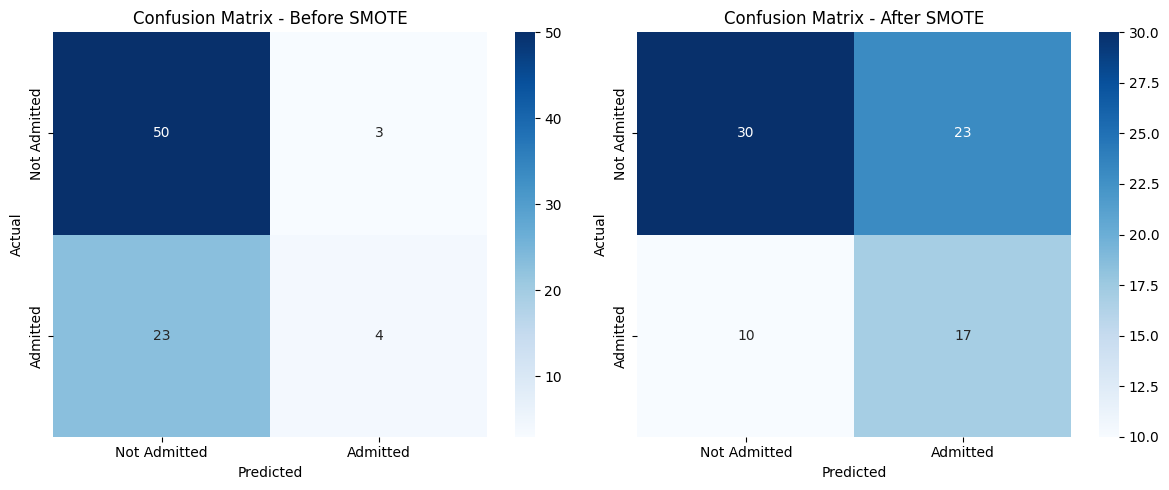

In [11]:
# Visualize the results
plt.figure(figsize=(12, 5))

# Confusion Matrix - Before SMOTE
plt.subplot(1, 2, 1)
cm_before = confusion_matrix(y_test, y_pred_before)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix - Before SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix - After SMOTE
plt.subplot(1, 2, 2)
cm_after = confusion_matrix(y_test, y_pred_after)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix - After SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

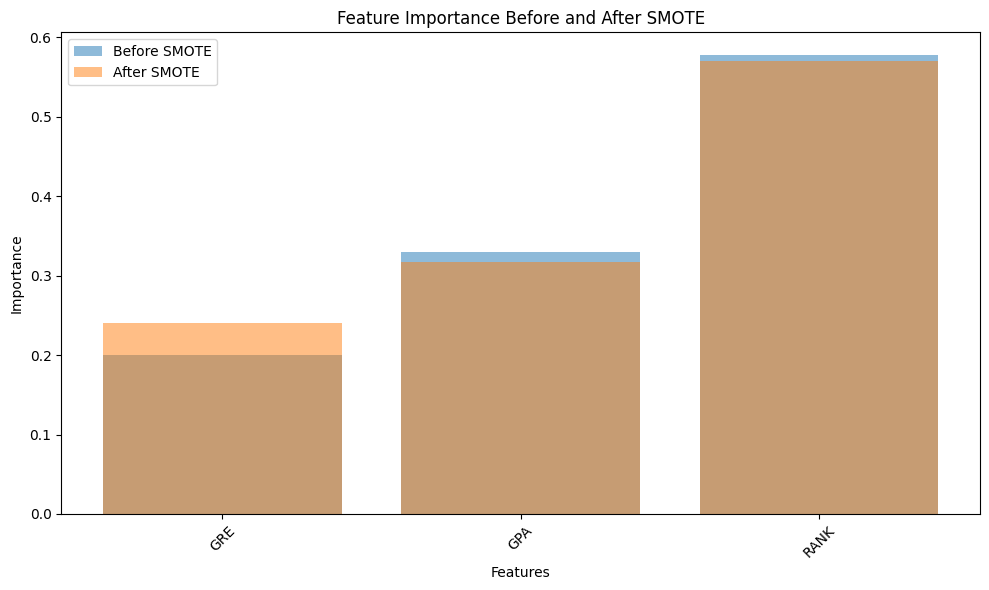

In [12]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
features = X.columns
importance_before = abs(model_before.coef_[0])
importance_after = abs(model_after.coef_[0])

plt.bar(features, importance_before, alpha=0.5, label='Before SMOTE')
plt.bar(features, importance_after, alpha=0.5, label='After SMOTE')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Before and After SMOTE')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Create a summary of the impact of SMOTE
print("\n--- Impact of SMOTE ---")
print(f"Before SMOTE - Accuracy: {accuracy_score(y_test, y_pred_before):.4f}")
print(f"After SMOTE - Accuracy: {accuracy_score(y_test, y_pred_after):.4f}")


--- Impact of SMOTE ---
Before SMOTE - Accuracy: 0.6750
After SMOTE - Accuracy: 0.5875


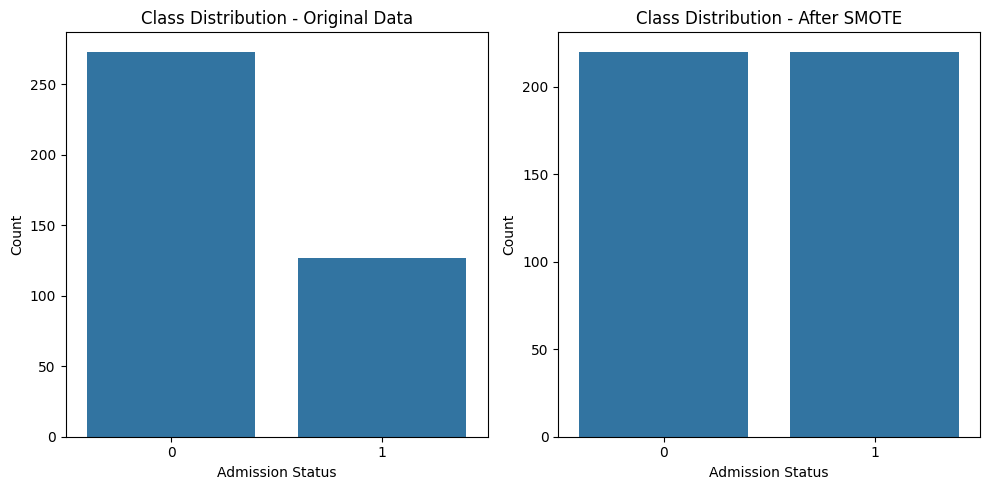

In [14]:
# Class distribution visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Admit', data=df)
plt.title('Class Distribution - Original Data')
plt.xlabel('Admission Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
smote_df = pd.DataFrame(data={
    'Admit': y_train_smote
})
sns.countplot(x='Admit', data=smote_df)
plt.title('Class Distribution - After SMOTE')
plt.xlabel('Admission Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()